# Praktikum 2 - CNN Improved Model (Cat vs Dog Classification)
## Tujuan: Mencapai Akurasi Testing > 80%

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Langkah 1: Data Preprocessing dengan Augmentasi Lebih Baik

In [2]:
# Data augmentasi untuk training dengan parameter yang lebih agresif
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentasi untuk testing (hanya normalisasi)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(128, 128),  # Ukuran lebih besar untuk lebih banyak detail
    batch_size=64,
    class_mode='binary'
)

# Load testing data
test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

print("Training set:", training_set.samples)
print("Testing set:", test_set.samples)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Training set: 8000
Testing set: 2000
Found 2000 images belonging to 2 classes.
Training set: 8000
Testing set: 2000


## Langkah 2: Pembuatan Model CNN Improved dengan Teknik Advanced

In [ ]:
cnn = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=[128, 128, 3]),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

cnn.summary()

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,518,209 (24.86 MB)

 Trainable params: 6,517,249 (24.86 MB)

 Non-trainable params: 960 (3.75 KB)

## Langkah 3: Kompilasi Model dengan Optimizer dan Learning Rate Schedule

In [4]:
# Learning rate scheduler untuk training yang lebih optimal
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

# Compile dengan optimizer yang lebih advanced
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    tf.keras.callbacks.LearningRateScheduler(lr_scheduler),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
]

## Langkah 4: Training Model

In [5]:
history = cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=25,
    callbacks=callbacks,
    verbose=1
)

print("\n" + "="*50)
print("TRAINING SELESAI")
print("="*50)

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.5710 - loss: 0.8668 - val_accuracy: 0.5030 - val_loss: 1.1482 - learning_rate: 0.0010
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.6006 - loss: 0.7171 - val_accuracy: 0.5000 - val_loss: 2.2712 - learning_rate: 0.0010
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.6186 - loss: 0.6714 - val_accuracy: 0.5225 - val_loss: 1.3494 - learning_rate: 0.0010
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.6306 - loss: 0.6438 - val_accuracy: 0.5475 - val_loss: 0.9346 - learning_rate: 0.0010
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.6526 - loss: 0.6259 - val_accuracy: 0.6715 - val_loss: 0.6261 - learning_rate: 0.0010
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.6571 - loss: 0.6166 - val_accuracy: 0.7095 - val_loss: 0.6369 - learning_rate: 9.0484e-04
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.6789 - loss

## Langkah 5: Visualisasi Hasil Training

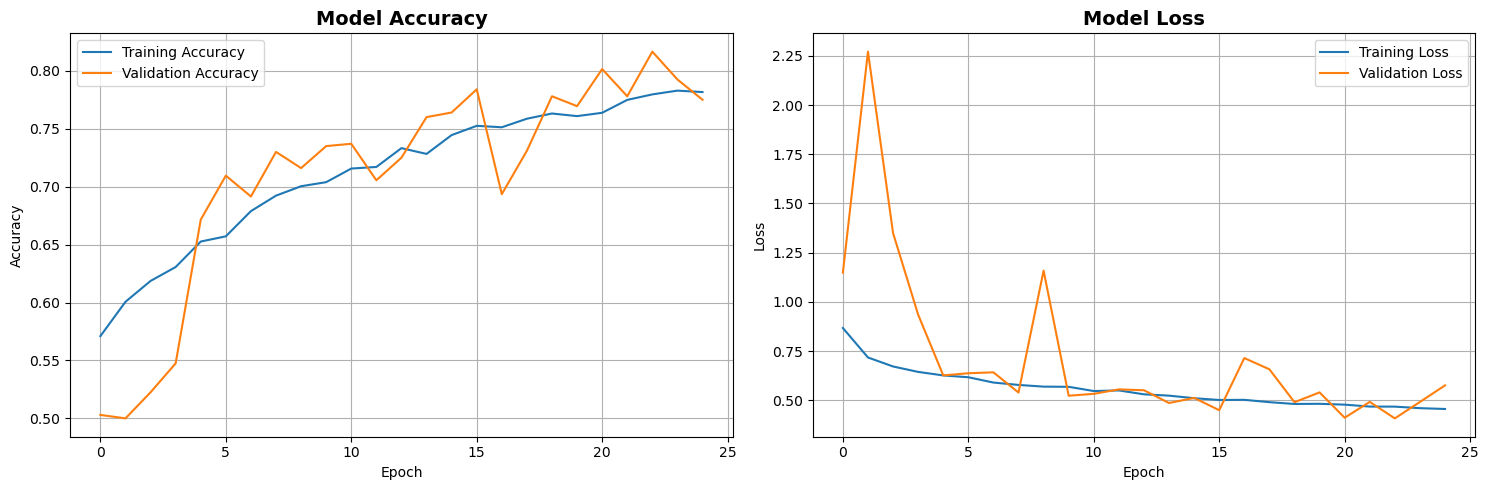


HASIL AKHIR TRAINING
Training Accuracy: 0.7816
Validation Accuracy: 0.7750
Training Loss: 0.4553
Validation Loss: 0.5753


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Plot Loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Print hasil akhir
print("\n" + "="*50)
print("HASIL AKHIR TRAINING")
print("="*50)
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
print("="*50)

# Bagian 2 - CNN untuk Klasifikasi Dataset MNIST

## Langkah 1: Load Dataset MNIST

In [10]:
# Load MNIST Dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape untuk CNN (menambah channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding untuk labels
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train_encoded.shape}")
print(f"Number of classes: {y_train_encoded.shape[1]}")

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Number of classes: 10


## Langkah 2: Visualisasi Sample Data MNIST

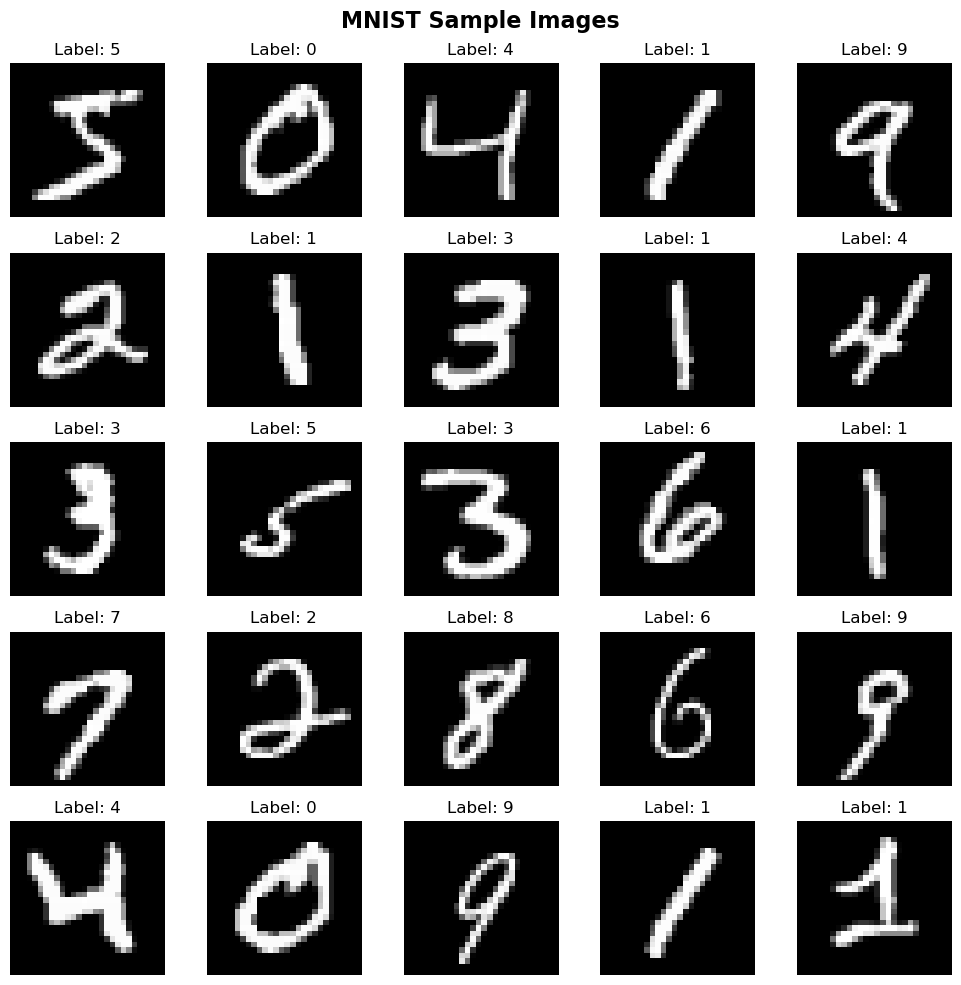

In [11]:
# Visualisasi 25 sample dari MNIST
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.suptitle('MNIST Sample Images', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Langkah 3: Pembuatan Model CNN untuk MNIST

In [12]:
# Model CNN untuk MNIST - Multi-class Classification
mnist_model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=[28, 28, 1]),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes untuk digit 0-9
])

mnist_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           51

 Total params: 208,874 (815.91 KB)

 Trainable params: 207,466 (810.41 KB)

 Non-trainable params: 1,408 (5.50 KB)

## Langkah 4: Kompilasi Model MNIST

In [16]:
# Learning rate scheduler untuk MNIST
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

# Compile model MNIST dengan categorical crossentropy untuk multi-class
optimizer_mnist = tf.keras.optimizers.Adam(learning_rate=0.001)
mnist_model.compile(
    optimizer=optimizer_mnist,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks untuk MNIST
mnist_callbacks = [
    tf.keras.callbacks.LearningRateScheduler(lr_scheduler),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
]

## Langkah 5: Training Model MNIST

In [17]:
# Training Model MNIST
mnist_history = mnist_model.fit(
    X_train,
    y_train_encoded,
    epochs=15,
    batch_size=128,
    validation_data=(X_test, y_test_encoded),
    callbacks=mnist_callbacks,
    verbose=1
)

print("\n" + "="*50)
print("TRAINING MNIST SELESAI")
print("="*50)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 159s 309ms/step - accuracy: 0.8444 - loss: 0.5106 - val_accuracy: 0.2912 - val_loss: 3.2745 - learning_rate: 0.0010
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 159s 309ms/step - accuracy: 0.8444 - loss: 0.5106 - val_accuracy: 0.2912 - val_loss: 3.2745 - learning_rate: 0.0010
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 259s 431ms/step - accuracy: 0.9679 - loss: 0.1116 - val_accuracy: 0.9896 - val_loss: 0.0361 - learning_rate: 0.0010
469/469 ━━━━━━━━━━━━━━━━━━━━ 259s 431ms/step - accuracy: 0.9679 - loss: 0.1116 - val_accuracy: 0.9896 - val_loss: 0.0361 - learning_rate: 0.0010
Epoch 3/15
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 213s 454ms/step - accuracy: 0.9778 - loss: 0.0764 - val_accuracy: 0.9919 - val_loss: 0.0302 - learning_rate: 0.0010
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 213s 454ms/step - accuracy: 0.9778 - loss: 0.0764 - val_accuracy: 0.9919 - val_loss: 0.0302 - learning_rate: 0.0010
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 160s 341ms/step - accura

## Langkah 6: Evaluasi Model MNIST

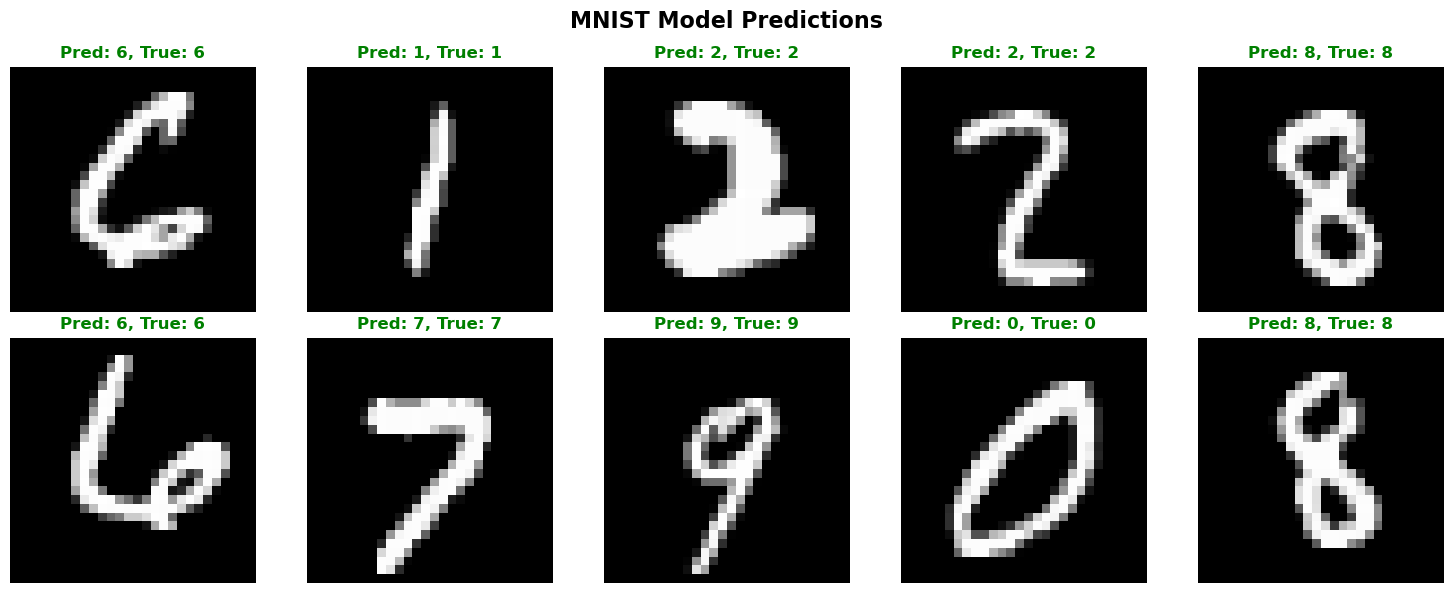


Green = Correct, Red = Incorrect


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi prediksi dari MNIST model
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Ambil 10 test images
test_indices = np.random.choice(len(X_test), 10, replace=False)

for idx, ax in enumerate(axes.ravel()):
    test_image = X_test[test_indices[idx]]
    
    # Prediksi
    prediction = mnist_model.predict(test_image.reshape(1, 28, 28, 1), verbose=0)
    predicted_class = np.argmax(prediction[0])
    true_class = y_test[test_indices[idx]]
    
    # Plot
    ax.imshow(test_image.reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {predicted_class}, True: {true_class}', 
                 color='green' if predicted_class == true_class else 'red',
                 fontweight='bold')
    ax.axis('off')

plt.suptitle('MNIST Model Predictions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nGreen = Correct, Red = Incorrect")